In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
# Note: Change the RAW URL before running the model
df = pd.read_csv('Features_For_Traditional_ML_Techniques.csv')
df.head(5)

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
example = df['statement']
print(example)

0         End of eviction moratorium means millions of A...
1         End of eviction moratorium means millions of A...
2         End of eviction moratorium means millions of A...
3         End of eviction moratorium means millions of A...
4         End of eviction moratorium means millions of A...
                                ...                        
134193    Joe Bidens great-grandfather Joseph J. Biden w...
134194    Joe Bidens great-grandfather Joseph J. Biden w...
134195    Joe Bidens great-grandfather Joseph J. Biden w...
134196    Joe Bidens great-grandfather Joseph J. Biden w...
134197    Joe Bidens great-grandfather Joseph J. Biden w...
Name: statement, Length: 134198, dtype: object


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

In [7]:
df['preprocessed_text'] = df['tweet'].apply(preprocess_text)

In [8]:
df['preprocessed_text']

0         potus biden blunder 6 month update inflation d...
1         s0sickrick stairmaster_ 6d6f636869 many people...
2         supreme court siding super rich property owner...
3         potus biden blunder broken campaign promise in...
4         ohcomfy agree confluence event right unprecede...
                                ...                        
134193    joe biden family owned african slave joe biden...
134194    joe bidens great great grandfather slave owner...
134195    chevychasetogo joe bidens great grandfather jo...
134196    joebiden fact bidens vp kamala harris great gr...
134197    sunny yes representation matter know bidens gr...
Name: preprocessed_text, Length: 134198, dtype: object

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.regularizers import l2

In [10]:
X = df[['tweet']]
y = df['BinaryNumTarget']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['tweet'])

In [15]:
X_train_seq = tokenizer.texts_to_sequences(X_train['tweet'])
X_test_seq = tokenizer.texts_to_sequences(X_test['tweet'])

In [16]:
max_seq_length = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

In [17]:
max_seq_length

118

In [18]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))
model.add(Bidirectional(LSTM(units=64, kernel_regularizer=l2(0.1), recurrent_regularizer=l2(0.1))))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 118, 128)          18637440  
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 18,736,385
Trainable params: 18,736,385
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=10, batch_size=32)


Epoch 1/10
3355/3355 [==============================] - 732s 218ms/step - loss: 0.7085 - accuracy: 0.9358 - val_loss: 0.0981 - val_accuracy: 0.9760
Epoch 2/10
3355/3355 [==============================] - 746s 222ms/step - loss: 0.0695 - accuracy: 0.9844 - val_loss: 0.0735 - val_accuracy: 0.9798
Epoch 3/10
3355/3355 [==============================] - 625s 186ms/step - loss: 0.0441 - accuracy: 0.9906 - val_loss: 0.0773 - val_accuracy: 0.9801
Epoch 4/10
3355/3355 [==============================] - 624s 186ms/step - loss: 0.0322 - accuracy: 0.9932 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 5/10
3355/3355 [==============================] - 659s 196ms/step - loss: 0.0249 - accuracy: 0.9948 - val_loss: 0.0834 - val_accuracy: 0.9772
Epoch 6/10
3355/3355 [==============================] - 661s 197ms/step - loss: 0.0194 - accuracy: 0.9963 - val_loss: 0.0941 - val_accuracy: 0.9750
Epoch 7/10
3355/3355 [==============================] - 688s 205ms/step - loss: 0.0144 - accuracy: 0.9976 - val_

In [21]:
y_pred = model.predict(X_test_pad)

y_pred

839/839 [==============================] - 11s 12ms/step


array([[2.4226794e-04],
       [9.9999106e-01],
       [2.3662426e-07],
       ...,
       [1.0000000e+00],
       [1.4142856e-07],
       [9.9999994e-01]], dtype=float32)

In [22]:
y_test

122451    0.0
14029     1.0
51449     0.0
17981     1.0
66284     1.0
         ... 
63240     1.0
45497     1.0
70763     1.0
105411    0.0
90519     1.0
Name: BinaryNumTarget, Length: 26840, dtype: float64

In [23]:
threshold = 0.5  

y_pred_binary = np.where(y_pred >= threshold, 1, 0) 

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9732116244411326
Precision: 0.9694810336140502
Recall: 0.9785672769543737
F1 Score: 0.9740029648913476


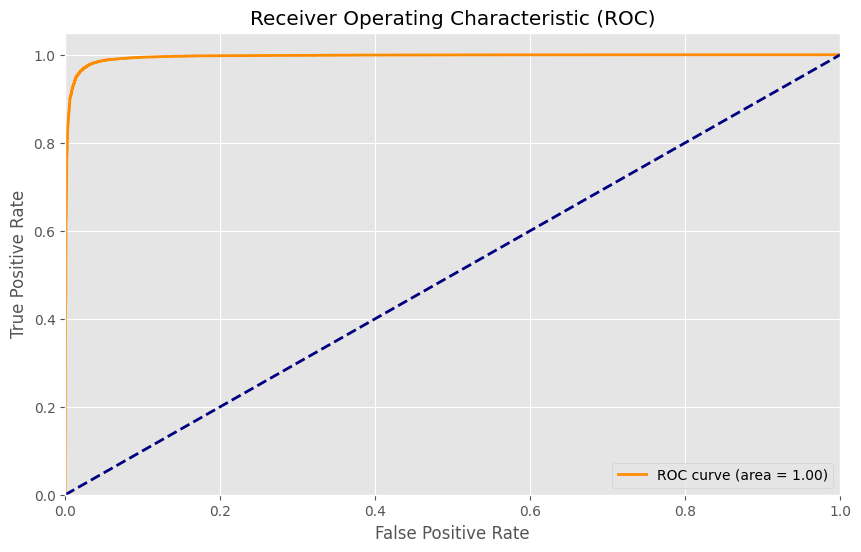

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

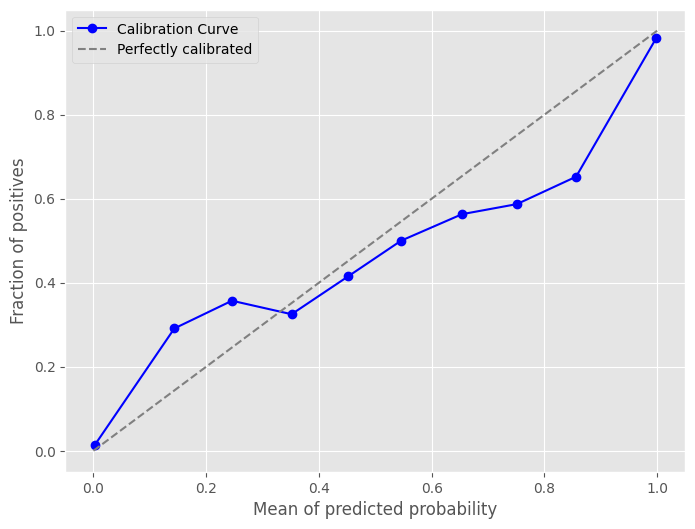

In [32]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', color='b', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean of predicted probability')
plt.ylabel('Fraction of positives')
plt.legend()
plt.grid(True)
plt.show()

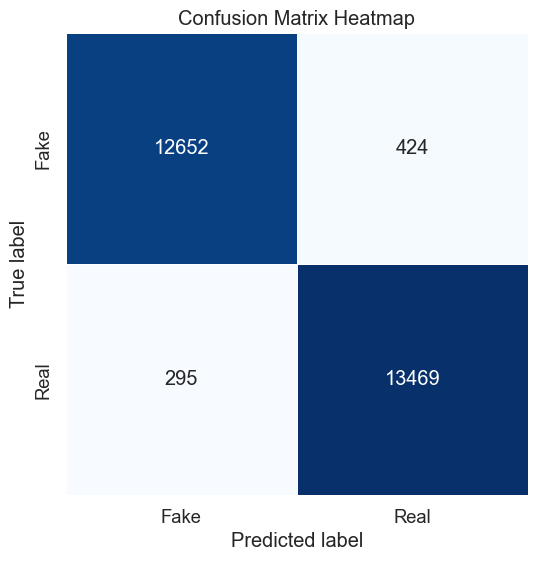

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Define class labels
classes = ['Fake', 'Real'] 
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=classes, yticklabels=classes, linewidths=0.5)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()